<a href="https://colab.research.google.com/github/blinov-89/BinaryTreeIDictionary/blob/master/%22%D0%AF%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2%D0%BB%D1%8C_0_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модули

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
import random,os,math

In [ ]:
# import os
import pandas as pd 
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from datetime import datetime, timedelta


In [ ]:
seed=0
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(seed)

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [ ]:
import pandas as pd
import os
import numpy as np
np.set_printoptions(precision=4)
import catboost
from catboost import * 
from catboost import datasets

# Датасет

Прежде чем разбираться с моделями, нам надо в первую очередь разобраться с тем, как грузить датасет. Давайте напишем класс в торче для этого.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# читаем датасет
df = pd.read_csv("/content/drive/MyDrive/Ярославль ИИ/train.csv")
print(df.shape)

(955, 39)


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Ярославль ИИ/test_dataset_test.csv")
print(test.shape)

(638, 33)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
test.head(3)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы"
0,54-001-019-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,1,0,0,0,0,0,0,0,0,0,1,1,1,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,23.0,21:30:00,05:00:00,0,1,1
1,54-002-133-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,22.0,00:00:00,09:00:00,0,0,0
2,54-001-007-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,0,NaN,употребляю в настоящее время,18.0,23:00:00,07:30:00,0,0,0


In [ ]:
df = df.append(test)

In [ ]:
print(df.shape)

(1593, 39)


In [ ]:
print(df.shape)

(1593, 39)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 0 to 637
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     1593 non-null   object 
 1   Пол                                    1592 non-null   object 
 2   Семья                                  1593 non-null   object 
 3   Этнос                                  1593 non-null   object 
 4   Национальность                         1593 non-null   object 
 5   Религия                                1593 non-null   object 
 6   Образование                            1593 non-null   object 
 7   Профессия                              1593 non-null   object 
 8   Вы работаете?                          1593 non-null   int64  
 9   Выход на пенсию                        1593 non-null   int64  
 10  Прекращение работы по болезни          1593 non-null   int64  
 11  Сахар

In [ ]:
df['Сон']= (pd.to_datetime(df['Время пробуждения']) - pd.to_datetime(df['Время засыпания']))

In [ ]:
df['Сон'] = df['Сон'].dt.components['hours']

In [ ]:
df.drop(["Время пробуждения", "Время засыпания"], axis=1, inplace=True)

In [ ]:
df.head(3)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,15.0,20.0,0,NaN,употребляю в настоящее время,18.0,0,0,0,54-102-358-02,0.0,0.0,0.0,0.0,0.0,8
1,54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,1,0,0,0,0,0,0,1,0,1,Никогда не курил(а),NaN,NaN,0,NaN,никогда не употреблял,NaN,1,0,0,54-103-101-01,1.0,1.0,0.0,0.0,0.0,4
2,54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),NaN,NaN,1,1-2 раза в неделю,употребляю в настоящее время,17.0,0,0,0,54-501-026-03,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
print(df.columns)

Index(['ID', 'Пол', 'Семья', 'Этнос', 'Национальность', 'Религия',
       'Образование', 'Профессия', 'Вы работаете?', 'Выход на пенсию',
       'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит',
       'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма',
       'Туберкулез легких ', 'ВИЧ/СПИД',
       'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы',
       'Статус Курения', 'Возраст курения', 'Сигарет в день',
       'Пассивное курение', 'Частота пасс кур', 'Алкоголь', 'Возраст алког',
       'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'ID_y',
       'Артериальная гипертензия', 'ОНМК',
       'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность',
       'Прочие заболевания сердца', 'Сон'],
      dtype='object')


In [ ]:
df.describe()

,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст курения,Сигарет в день,Пассивное курение,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,681.000000,674.000000,1593.000000,1289.000000,1593.000000,1593.000000,1593.000000,955.000000,955.000000,955.000000,955.000000,955.000000,1593.000000
mean,0.543001,0.316384,0.052731,0.095417,0.114878,0.045198,0.077841,0.039548,0.017577,0.001255,0.624608,0.053358,0.352166,20.270191,14.111276,0.237288,20.098526,0.226616,0.064030,0.022599,0.467016,0.042932,0.122513,0.100524,0.090052,7.558067
std,0.498304,0.465211,0.223566,0.293883,0.318974,0.207803,0.268005,0.194956,0.131449,0.035422,0.484376,0.224818,0.477795,7.934686,11.962712,0.425554,5.209619,0.418774,0.244883,0.148668,0.499172,0.202810,0.328049,0.300854,0.286407,1.558104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,5.250000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,10.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.000000,20.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,58.000000,180.000000,1.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.describe(include=['object', 'bool'])

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Статус Курения,Частота пасс кур,Алкоголь,ID_y
count,1593,1592,1593,1593,1593,1593,1593,1593,1593,377,1593,955
unique,1593,2,6,3,20,6,4,11,4,5,3,955
top,54-102-358-02,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,дипломированные специалисты,Никогда не курил(а),1-2 раза в неделю,употребляю в настоящее время,54-102-358-02
freq,1,1117,937,1559,1500,1361,757,382,911,158,1046,1


# Пропуски

In [ ]:
df.isnull().sum()

ID                                          0
Пол                                         1
Семья                                       0
Этнос                                       0
Национальность                              0
Религия                                     0
Образование                                 0
Профессия                                   0
Вы работаете?                               0
Выход на пенсию                             0
Прекращение работы по болезни               0
Сахарный диабет                             0
Гепатит                                     0
Онкология                                   0
Хроническое заболевание легких              0
Бронжиальная астма                          0
Туберкулез легких                           0
ВИЧ/СПИД                                    0
Регулярный прим лекарственных средств       0
Травмы за год                               0
Переломы                                    0
Статус Курения                    

In [ ]:
df["Возраст курения"].fillna("0", inplace = True)

In [ ]:
df["Сигарет в день"].fillna("0", inplace = True)

In [ ]:
df["Возраст алког"].fillna("0", inplace = True)

In [ ]:
df.drop('Частота пасс кур', axis=1, inplace=True)

In [ ]:
df[['Возраст курения', 'Сигарет в день', 'Возраст алког']] = df[['Возраст курения', 'Сигарет в день', 'Возраст алког']].astype(int)

In [ ]:
df.head(3)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,15,20,0,употребляю в настоящее время,18,0,0,0,54-102-358-02,0.0,0.0,0.0,0.0,0.0,8
1,54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,1,0,0,0,0,0,0,1,0,1,Никогда не курил(а),0,0,0,никогда не употреблял,0,1,0,0,54-103-101-01,1.0,1.0,0.0,0.0,0.0,4
2,54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,1,употребляю в настоящее время,17,0,0,0,54-501-026-03,0.0,0.0,0.0,0.0,0.0,8


# Кодирование

In [ ]:
df[df.isnull().any(axis=1)]

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
304,54-701-009-01,NaN,гражданский брак / проживание с партнером,европейская,Русские,Нет,3 - средняя школа / закон.среднее / выше среднего,"работники, занятые в сфере обслуживания, торг...",1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,18,3,0,употребляю в настоящее время,20,0,0,0,54-701-009-01,0.0,0.0,0.0,0.0,0.0,5
0,54-001-019-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,1,0,0,0,0,0,0,0,0,0,1,1,1,Никогда не курил(а),0,0,0,употребляю в настоящее время,23,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,7
1,54-002-133-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,употребляю в настоящее время,22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
2,54-001-007-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,употребляю в настоящее время,18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8
3,54-102-116-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,1,0,0,0,1,0,0,0,0,0,0,0,1,Никогда не курил(а),0,0,0,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,54-102-095-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,0,1,0,0,0,0,0,0,1,1,1,Никогда не курил(а),0,0,0,употребляю в настоящее время,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7
634,54-102-235-01,Ж,вдовец / вдова,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
635,54-502-016-01,Ж,гражданский брак / проживание с партнером,европейская,Русские,Христианство,4 - профессиональное училище,техники и младшие специалисты,1,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,1,ранее употреблял,25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
636,54-002-138-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,"работники, занятые в сфере обслуживания, торг...",1,0,0,0,0,0,0,0,0,0,0,0,0,Никогда не курил(а),0,0,1,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8


In [ ]:
df["Пол"].value_counts()

Ж    1117
М     475
Name: Пол, dtype: int64

In [ ]:
df = df.fillna({"Пол": "Ж"})

In [ ]:
df[df.isnull().any(axis=1)]

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
0,54-001-019-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,1,0,0,0,0,0,0,0,0,0,1,1,1,Никогда не курил(а),0,0,0,употребляю в настоящее время,23,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,7
1,54-002-133-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,употребляю в настоящее время,22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
2,54-001-007-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,употребляю в настоящее время,18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8
3,54-102-116-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,1,0,0,0,1,0,0,0,0,0,0,0,1,Никогда не курил(а),0,0,0,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8
4,54-502-005-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,1,0,0,0,0,0,0,0,0,1,1,1,Курит,14,20,0,употребляю в настоящее время,19,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,54-102-095-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,1,0,0,1,0,0,0,0,0,0,1,1,1,Никогда не курил(а),0,0,0,употребляю в настоящее время,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7
634,54-102-235-01,Ж,вдовец / вдова,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,0,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
635,54-502-016-01,Ж,гражданский брак / проживание с партнером,европейская,Русские,Христианство,4 - профессиональное училище,техники и младшие специалисты,1,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,1,ранее употреблял,25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9
636,54-002-138-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,"работники, занятые в сфере обслуживания, торг...",1,0,0,0,0,0,0,0,0,0,0,0,0,Никогда не курил(а),0,0,1,никогда не употреблял,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8


In [ ]:
df.head(3)

,ID,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон
0,54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,0,0,0,0,0,0,0,0,0,0,Курит,15,20,0,употребляю в настоящее время,18,0,0,0,54-102-358-02,0.0,0.0,0.0,0.0,0.0,8
1,54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,1,0,0,0,0,0,0,1,0,1,Никогда не курил(а),0,0,0,никогда не употреблял,0,1,0,0,54-103-101-01,1.0,1.0,0.0,0.0,0.0,4
2,54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,0,0,0,0,0,0,0,1,0,0,Никогда не курил(а),0,0,1,употребляю в настоящее время,17,0,0,0,54-501-026-03,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
df["Религия"].unique()

array(['Христианство', 'Атеист / агностик', 'Ислам', 'Нет', 'Другое',
       'Индуизм'], dtype=object)

In [ ]:
df["Статус Курения"].unique()

array(['Курит', 'Никогда не курил(а)', 'Бросил(а)', 'Никогда не курил'],
      dtype=object)

In [ ]:
cleanup_nums = {"Пол":     {"М": 0, "Ж": 1},
                "Образование": {"3 - средняя школа / закон.среднее / выше среднего": 3, "5 - ВУЗ": 5, "2 - начальная школа": 2, "4 - профессиональное училище": 4}, 
                "Религия": {'Христианство': 1, 'Атеист / агностик': 2, 'Ислам': 3, 'Индуизм': 4, 'Другое': 5, 'Нет': 0},
                "Статус Курения": {'Курит': 1, 'Никогда не курил(а)': 0, 'Никогда не курил': 0, 'Бросил(а)':2},
                "Алкоголь": {'употребляю в настоящее время': 1, 'никогда не употреблял': 0, 'ранее употреблял': 2},
                "Этнос": {'европейская': 1,'другая азиатская (Корея, Малайзия, Таиланд, Вьетнам, Казахстан, Киргизия, Туркмения, Узбекистан, Таджикистан)': 2,
                        'прочее (любая иная этно-расовая группа, не представленная выше)': 0}}

In [ ]:
df = df.replace(cleanup_nums)

In [ ]:
df.dtypes

ID                                        object
Пол                                        int64
Семья                                     object
Этнос                                      int64
Национальность                            object
Религия                                    int64
Образование                                int64
Профессия                                 object
Вы работаете?                              int64
Выход на пенсию                            int64
Прекращение работы по болезни              int64
Сахарный диабет                            int64
Гепатит                                    int64
Онкология                                  int64
Хроническое заболевание легких             int64
Бронжиальная астма                         int64
Туберкулез легких                          int64
ВИЧ/СПИД                                   int64
Регулярный прим лекарственных средств      int64
Травмы за год                              int64
Переломы            

In [ ]:
df=pd.get_dummies(df, columns=["Семья", "Национальность", "Профессия"])

In [ ]:
df.head(3)

,ID,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
0,54-102-358-02,0,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,15,20,0,1,18,0,0,0,54-102-358-02,0.0,0.0,0.0,0.0,0.0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,54-103-101-01,1,1,1,5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,54-103-101-01,1.0,1.0,0.0,0.0,0.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,54-501-026-03,1,1,1,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,17,0,0,0,54-501-026-03,0.0,0.0,0.0,0.0,0.0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(df.shape)

(1593, 71)


In [ ]:
df.describe()

,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,955.000000,955.000000,955.000000,955.000000,955.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,0.701820,1.008788,1.075957,4.155681,0.543001,0.316384,0.052731,0.095417,0.114878,0.045198,0.077841,0.039548,0.017577,0.001255,0.624608,0.053358,0.352166,0.629002,8.665411,5.970496,0.237288,0.966729,16.263026,0.226616,0.064030,0.022599,0.467016,0.042932,0.122513,0.100524,0.090052,7.558067,0.588198,0.126177,0.154426,0.080979,0.048336,0.001883,0.002511,0.001883,0.000628,0.001883,0.000628,0.001883,0.001255,0.001883,0.001255,0.000628,0.000628,0.001255,0.006277,0.941620,0.001255,0.020716,0.001255,0.006277,0.005650,0.000628,0.083490,0.005650,0.239799,0.015694,0.141243,0.080352,0.034526,0.128688,0.093534,0.089140,0.087884
std,0.457602,0.145875,0.459277,0.720915,0.498304,0.465211,0.223566,0.293883,0.318974,0.207803,0.268005,0.194956,0.131449,0.035422,0.484376,0.224818,0.477795,0.797980,11.292276,10.446610,0.425554,0.585222,9.185511,0.418774,0.244883,0.148668,0.499172,0.202810,0.328049,0.300854,0.286407,1.558104,0.492314,0.332153,0.361470,0.272889,0.214544,0.043369,0.050062,0.043369,0.025055,0.043369,0.025055,0.043369,0.035422,0.043369,0.035422,0.025055,0.025055,0.035422,0.079006,0.234535,0.035422,0.142475,0.035422,0.079006,0.074976,0.025055,0.276709,0.074976,0.427095,0.124326,0.348381,0.271922,0.182633,0.334959,0.291271,0.285035,0.283216
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

# Делим датасет на обуч и тест выборки

In [ ]:
test=df[df.isnull().any(axis=1)]

In [ ]:
test=test.set_index('ID')

In [ ]:
test.head(3)

,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54-001-019-01,1,1,1,3,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,23,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54-002-133-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
54-001-007-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(test.shape)

(638, 70)


In [ ]:
test=test.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)

In [ ]:
print(test.shape)

(638, 64)


In [ ]:
print(df.shape)

(1593, 71)


In [ ]:
df[df.isnull().any(axis=1)]

,ID,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
0,54-001-019-01,1,1,1,3,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,23,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,54-002-133-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,54-001-007-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,18,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,54-102-116-01,1,1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,54-502-005-02,0,1,1,3,0,1,0,0,0,0,0,0,0,0,1,1,1,1,14,20,0,1,19,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,54-102-095-01,1,1,1,5,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,30,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
634,54-102-235-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
635,54-502-016-01,1,1,1,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,25,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
636,54-002-138-01,1,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=df.dropna()

In [ ]:
df=df.set_index('ID')

In [ ]:
print(df.shape)

(955, 70)


In [ ]:
df.head(3)

,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца,Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,0,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,15,20,0,1,18,0,0,0,54-102-358-02,0.0,0.0,0.0,0.0,0.0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54-103-101-01,1,1,1,5,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,54-103-101-01,1.0,1.0,0.0,0.0,0.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
54-501-026-03,1,1,1,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,17,0,0,0,54-501-026-03,0.0,0.0,0.0,0.0,0.0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 54-102-358-02 to 54-702-016-01
Data columns (total 70 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Пол                                                                                            955 non-null    int64  
 1   Этнос                                                                                          955 non-null    int64  
 2   Религия                                                                                        955 non-null    int64  
 3   Образование                                                                                    955 non-null    int64  
 4   Вы работаете?                                                                                  955 non-null    int64  
 5   Выход

# Просмотр разБалансировки классов

In [ ]:
df['Артериальная гипертензия'].value_counts()

0.0    509
1.0    446
Name: Артериальная гипертензия, dtype: int64

In [ ]:
df['ОНМК'].value_counts()

0.0    914
1.0     41
Name: ОНМК, dtype: int64

In [ ]:
df['Стенокардия, ИБС, инфаркт миокарда'].value_counts()

0.0    838
1.0    117
Name: Стенокардия, ИБС, инфаркт миокарда, dtype: int64

In [ ]:
df['Сердечная недостаточность'].value_counts()

0.0    859
1.0     96
Name: Сердечная недостаточность, dtype: int64

In [ ]:
df['Прочие заболевания сердца'].value_counts()

0.0    869
1.0     86
Name: Прочие заболевания сердца, dtype: int64

# Модель Артериальная гипертензия

In [ ]:
Y=df[['Артериальная гипертензия']]
Y.head(3)

,Артериальная гипертензия
ID,
54-102-358-02,0.0
54-103-101-01,1.0
54-501-026-03,0.0


In [ ]:
X=df.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

# catboost

In [ ]:
X.columns.get_loc("Сигарет в день")

19

In [ ]:
X.columns.get_loc("Возраст курения")

18

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
pool1 = Pool(data=X, label=Y, cat_features=cat_features)

X_prepared = X.values.astype(str).astype(object)

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=Y.values
)

print("Dataset shape")
print(f"Dataset 1: {str(pool1.shape)}")
print(f"Dataset 4: {str(pool4.shape)}")
print()
print("Column names")
print(f"Dataset 1: {pool1.get_feature_names()}")
print(f"Dataset 4: {pool4.get_feature_names()}")



Dataset shape
Dataset 1: (955, 64)
Dataset 4: (955, 64)

Column names
Dataset 1: ['Пол', 'Этнос', 'Религия', 'Образование', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Алкоголь', 'Возраст алког', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'Сон', 'Семья_в браке в настоящее время', 'Семья_в разводе', 'Семья_вдовец / вдова', 'Семья_гражданский брак / проживание с партнером', 'Семья_никогда не был(а) в браке', 'Семья_раздельное проживание (официально не разведены)', 'Национальность_Азербайджанцы', 'Национальность_Армяне', 'Национальность_Башкиры', 'Национальность_Белорусы', 'Национальность_Буряты', 'Национальность_Другие национальности', 'Национальность_Евреи', 'Национальность_Каз

In [ ]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

In [ ]:
model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.15}


In [ ]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
         verbose=35
)

0:	learn: 0.6613733	test: 0.6612233	best: 0.6612233 (0)	total: 27.2ms	remaining: 5.42s
35:	learn: 0.4557842	test: 0.5380222	best: 0.5378635 (33)	total: 621ms	remaining: 2.83s
70:	learn: 0.3501951	test: 0.5285668	best: 0.5271371 (62)	total: 1.32s	remaining: 2.39s
105:	learn: 0.2857592	test: 0.5335397	best: 0.5205066 (88)	total: 1.93s	remaining: 1.71s
140:	learn: 0.2351810	test: 0.5393730	best: 0.5205066 (88)	total: 2.47s	remaining: 1.03s
175:	learn: 0.1993535	test: 0.5387800	best: 0.5205066 (88)	total: 2.87s	remaining: 391ms
199:	learn: 0.1726615	test: 0.5407876	best: 0.5205066 (88)	total: 3.05s	remaining: 0us

bestTest = 0.5205066244
bestIteration = 88

Shrink model to first 89 iterations.


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False,
          plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.01'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    random_seed=0,
    learning_rate=0.15
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 89


In [ ]:
AG=np.array(model.predict(test))

# Важность признаков

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

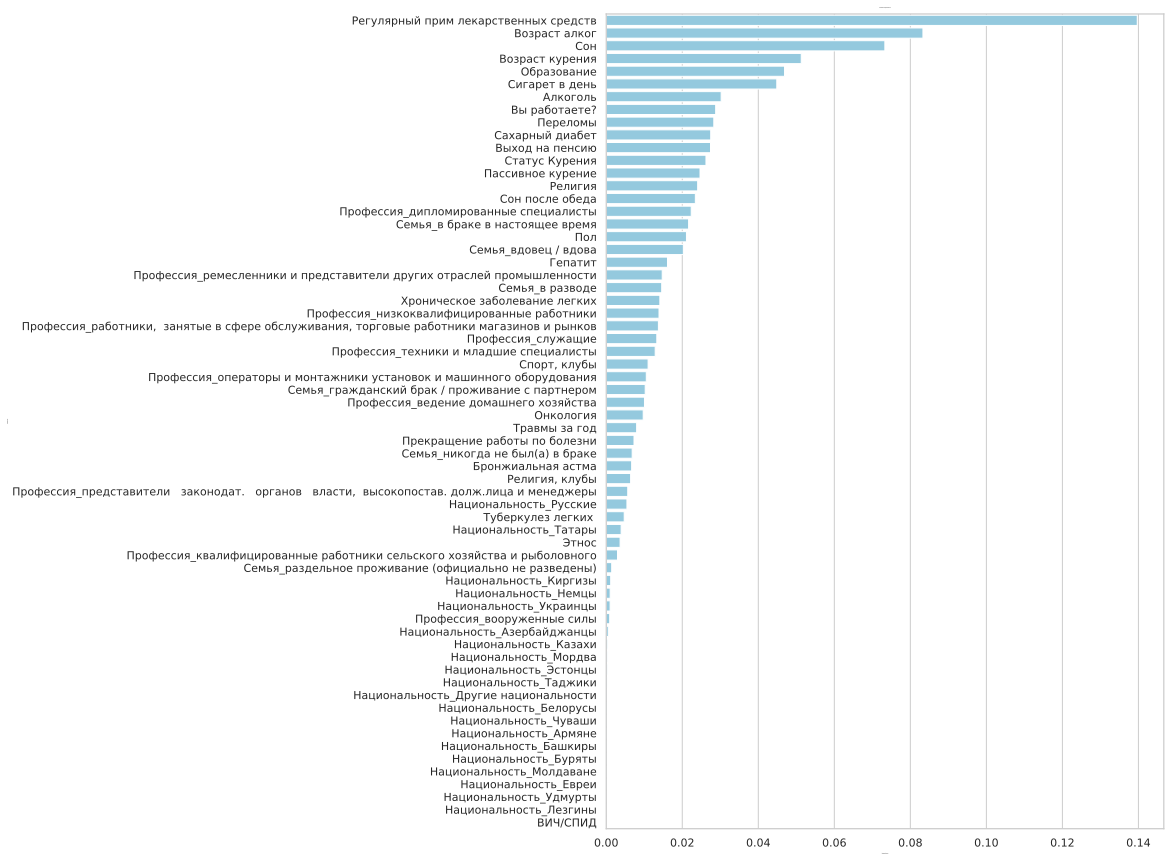

None

,Features,Gini-Importance
0,Регулярный прим лекарственных средств,0.139692
1,Возраст алког,0.083311
2,Сон,0.073296
3,Возраст курения,0.051298
4,Образование,0.046901
...,...,...
59,Национальность_Молдаване,0.000093
60,Национальность_Евреи,0.000032
61,Национальность_Удмурты,0.000000
62,Национальность_Лезгины,0.000000


In [ ]:
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 1)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.0)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=1, weight = 'bold')
plt.ylabel('Features', fontsize=1, weight = 'bold')
plt.title('Feature Importance', fontsize=1, weight = 'bold')
display(plt.show())
display(importances)

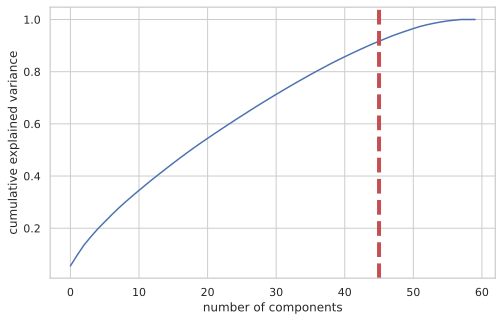

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.055812,0.055812
1,0.097423,0.041611
2,0.136382,0.038958
3,0.168054,0.031672
4,0.197788,0.029734
5,0.224469,0.026681
6,0.250974,0.026505
7,0.276478,0.025504
8,0.300268,0.023790
9,0.322957,0.022689


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=60)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=45, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(45))

# Модель ОНМК

In [ ]:
rat = len(df.loc[df['ОНМК']==0])//len(df.loc[df['ОНМК']==1])
rat

22

In [ ]:
df_1 = df.loc[df['ОНМК']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['ОНМК']==0], df_1]).sample(frac=1)

In [ ]:
df_n['ОНМК'].value_counts()

0.0    914
1.0    902
Name: ОНМК, dtype: int64

In [ ]:
Y=df_n[['ОНМК']]
Y.head(3)

,ОНМК
ID,
54-001-083-01,0.0
54-504-007-01,0.0
54-001-067-01,0.0


In [ ]:
Y.value_counts()

ОНМК
0.0     914
1.0     902
dtype: int64

In [ ]:
Y.shape

(1816, 1)

In [ ]:
X=df_n.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)

# catboost

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
pool1 = Pool(data=X, label=Y, cat_features=cat_features)
X_prepared = X.values.astype(str).astype(object)

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=Y.values
)

print("Dataset shape")
print(f"Dataset 1: {str(pool1.shape)}")
print(f"Dataset 4: {str(pool4.shape)}")
print()
print("Column names")
print(f"Dataset 1: {pool1.get_feature_names()}")
print(f"Dataset 4: {pool4.get_feature_names()}")



Dataset shape
Dataset 1: (1816, 64)
Dataset 4: (1816, 64)

Column names
Dataset 1: ['Пол', 'Этнос', 'Религия', 'Образование', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Алкоголь', 'Возраст алког', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'Сон', 'Семья_в браке в настоящее время', 'Семья_в разводе', 'Семья_вдовец / вдова', 'Семья_гражданский брак / проживание с партнером', 'Семья_никогда не был(а) в браке', 'Семья_раздельное проживание (официально не разведены)', 'Национальность_Азербайджанцы', 'Национальность_Армяне', 'Национальность_Башкиры', 'Национальность_Белорусы', 'Национальность_Буряты', 'Национальность_Другие национальности', 'Национальность_Евреи', 'Национальность_К

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=42)

In [ ]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

In [ ]:
model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.15}


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
         verbose=35
)

0:	learn: 0.6522911	test: 0.6606440	best: 0.6606440 (0)	total: 7.42ms	remaining: 1.48s
35:	learn: 0.1928731	test: 0.3157564	best: 0.3157564 (35)	total: 230ms	remaining: 1.05s
70:	learn: 0.0790619	test: 0.2391827	best: 0.2386816 (69)	total: 475ms	remaining: 863ms
105:	learn: 0.0420803	test: 0.2180479	best: 0.2174638 (99)	total: 711ms	remaining: 631ms
140:	learn: 0.0276429	test: 0.2157204	best: 0.2156417 (137)	total: 947ms	remaining: 396ms
175:	learn: 0.0198741	test: 0.2222547	best: 0.2155986 (141)	total: 1.18s	remaining: 161ms
199:	learn: 0.0152595	test: 0.2250653	best: 0.2155986 (141)	total: 1.34s	remaining: 0us

bestTest = 0.2155985513
bestIteration = 141

Shrink model to first 142 iterations.


In [ ]:
model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False,
          plot=False
)

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.01'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    random_seed=0,
    learning_rate=0.15
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 142


In [ ]:
ONMK=np.array(model.predict(test))

# Модель Стенокардия, ИБС, инфаркт миокарда

In [ ]:
rat = len(df.loc[df['Стенокардия, ИБС, инфаркт миокарда']==0])//len(df.loc[df['Стенокардия, ИБС, инфаркт миокарда']==1])
rat

7

In [ ]:
df_1 = df.loc[df['Стенокардия, ИБС, инфаркт миокарда']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['Стенокардия, ИБС, инфаркт миокарда']==0], df_1]).sample(frac=1)

In [ ]:
df_n['Стенокардия, ИБС, инфаркт миокарда'].value_counts()

0.0    838
1.0    819
Name: Стенокардия, ИБС, инфаркт миокарда, dtype: int64

In [ ]:
Y=df_n[['Стенокардия, ИБС, инфаркт миокарда']]
Y.head(3)

,"Стенокардия, ИБС, инфаркт миокарда"
ID,
54-501-034-01,1.0
54-101-072-01,0.0
54-701-040-01,0.0


In [ ]:
X=df_n.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)

# catboost

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
pool1 = Pool(data=X, label=Y, cat_features=cat_features)
X_prepared = X.values.astype(str).astype(object)

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=Y.values
)

print("Dataset shape")
print(f"Dataset 1: {str(pool1.shape)}")
print(f"Dataset 4: {str(pool4.shape)}")
print()
print("Column names")
print(f"Dataset 1: {pool1.get_feature_names()}")
print(f"Dataset 4: {pool4.get_feature_names()}")



Dataset shape
Dataset 1: (1657, 64)
Dataset 4: (1657, 64)

Column names
Dataset 1: ['Пол', 'Этнос', 'Религия', 'Образование', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Алкоголь', 'Возраст алког', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'Сон', 'Семья_в браке в настоящее время', 'Семья_в разводе', 'Семья_вдовец / вдова', 'Семья_гражданский брак / проживание с партнером', 'Семья_никогда не был(а) в браке', 'Семья_раздельное проживание (официально не разведены)', 'Национальность_Азербайджанцы', 'Национальность_Армяне', 'Национальность_Башкиры', 'Национальность_Белорусы', 'Национальность_Буряты', 'Национальность_Другие национальности', 'Национальность_Евреи', 'Национальность_К

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=42)

In [ ]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

In [ ]:
model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.15}


In [ ]:
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
         verbose=35
)

0:	learn: 0.6415251	test: 0.6572161	best: 0.6572161 (0)	total: 6.97ms	remaining: 1.39s
35:	learn: 0.3140990	test: 0.5415773	best: 0.5415773 (35)	total: 189ms	remaining: 862ms
70:	learn: 0.1846874	test: 0.5170494	best: 0.5170494 (70)	total: 385ms	remaining: 699ms
105:	learn: 0.1117510	test: 0.5002718	best: 0.5001446 (104)	total: 582ms	remaining: 517ms
140:	learn: 0.0751607	test: 0.5034045	best: 0.4944120 (113)	total: 813ms	remaining: 340ms
175:	learn: 0.0555477	test: 0.5092727	best: 0.4944120 (113)	total: 1.03s	remaining: 140ms
199:	learn: 0.0476709	test: 0.5116561	best: 0.4944120 (113)	total: 1.17s	remaining: 0us

bestTest = 0.4944120483
bestIteration = 113

Shrink model to first 114 iterations.


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False,
          plot=False
)

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.01'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    random_seed=0,
    learning_rate=0.15
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 114


In [ ]:
Cten=np.array(model.predict(test))

# Модель Сердечная недостаточность

In [ ]:
rat = len(df.loc[df['Сердечная недостаточность']==0])//len(df.loc[df['Сердечная недостаточность']==1])
rat

8

In [ ]:
df_1 = df.loc[df['Сердечная недостаточность']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['Сердечная недостаточность']==0], df_1]).sample(frac=1)

In [ ]:
df_n['Сердечная недостаточность'].value_counts()

0.0    859
1.0    768
Name: Сердечная недостаточность, dtype: int64

In [ ]:
Y=df_n[['Сердечная недостаточность']]
Y.head(3)

,Сердечная недостаточность
ID,
54-002-192-01,0.0
54-102-016-01,1.0
54-501-027-01,1.0


In [ ]:
X=df_n.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)
X.head(3)

,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54-002-192-01,1,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,17,1,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54-102-016-01,1,1,1,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36,0,0,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
54-501-027-01,1,1,1,4,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

# catboost

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
pool1 = Pool(data=X, label=Y, cat_features=cat_features)
X_prepared = X.values.astype(str).astype(object)

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=Y.values
)

print("Dataset shape")
print(f"Dataset 1: {str(pool1.shape)}")
print(f"Dataset 4: {str(pool4.shape)}")
print()
print("Column names")
print(f"Dataset 1: {pool1.get_feature_names()}")
print(f"Dataset 4: {pool4.get_feature_names()}")



Dataset shape
Dataset 1: (1627, 64)
Dataset 4: (1627, 64)

Column names
Dataset 1: ['Пол', 'Этнос', 'Религия', 'Образование', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Алкоголь', 'Возраст алког', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'Сон', 'Семья_в браке в настоящее время', 'Семья_в разводе', 'Семья_вдовец / вдова', 'Семья_гражданский брак / проживание с партнером', 'Семья_никогда не был(а) в браке', 'Семья_раздельное проживание (официально не разведены)', 'Национальность_Азербайджанцы', 'Национальность_Армяне', 'Национальность_Башкиры', 'Национальность_Белорусы', 'Национальность_Буряты', 'Национальность_Другие национальности', 'Национальность_Евреи', 'Национальность_К

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

In [ ]:
model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.15}


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
         verbose=35
)

0:	learn: 0.6338413	test: 0.6432586	best: 0.6432586 (0)	total: 8.77ms	remaining: 1.75s
35:	learn: 0.2343683	test: 0.2098348	best: 0.2098348 (35)	total: 283ms	remaining: 1.29s
70:	learn: 0.1381829	test: 0.1319516	best: 0.1319516 (70)	total: 571ms	remaining: 1.04s
105:	learn: 0.0912796	test: 0.1032892	best: 0.1030719 (104)	total: 873ms	remaining: 774ms
140:	learn: 0.0649022	test: 0.0871881	best: 0.0871881 (140)	total: 1.21s	remaining: 505ms
175:	learn: 0.0486933	test: 0.0767106	best: 0.0767106 (175)	total: 2.13s	remaining: 291ms
199:	learn: 0.0378785	test: 0.0716335	best: 0.0716335 (199)	total: 2.85s	remaining: 0us

bestTest = 0.07163353964
bestIteration = 199



In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False,
          plot=False
)

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.01'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    random_seed=0,
    learning_rate=0.15
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 481


In [ ]:
CN=np.array(model.predict(test))

# Модель Прочие заболевания сердца

In [ ]:
rat = len(df.loc[df['Прочие заболевания сердца']==0])//len(df.loc[df['Прочие заболевания сердца']==1])
rat

10

In [ ]:
df_1 = df.loc[df['Прочие заболевания сердца']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
df_n = pd.concat([df.loc[df['Прочие заболевания сердца']==0], df_1]).sample(frac=1)

In [ ]:
df_n['Прочие заболевания сердца'].value_counts()

0.0    869
1.0    860
Name: Прочие заболевания сердца, dtype: int64

In [ ]:
Y=df_n[['Прочие заболевания сердца']]
Y.head(3)

,Прочие заболевания сердца
ID,
54-002-010-01,1.0
54-501-062-01,1.0
54-102-019-02,0.0


In [ ]:
X=df_n.drop(columns=['ID_y','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца'], axis=1)
X.head(3)

,Пол,Этнос,Религия,Образование,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Статус Курения,Возраст курения,Сигарет в день,Пассивное курение,Алкоголь,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",Сон,Семья_в браке в настоящее время,Семья_в разводе,Семья_вдовец / вдова,Семья_гражданский брак / проживание с партнером,Семья_никогда не был(а) в браке,Семья_раздельное проживание (официально не разведены),Национальность_Азербайджанцы,Национальность_Армяне,Национальность_Башкиры,Национальность_Белорусы,Национальность_Буряты,Национальность_Другие национальности,Национальность_Евреи,Национальность_Казахи,Национальность_Киргизы,Национальность_Лезгины,Национальность_Молдаване,Национальность_Мордва,Национальность_Немцы,Национальность_Русские,Национальность_Таджики,Национальность_Татары,Национальность_Удмурты,Национальность_Украинцы,Национальность_Чуваши,Национальность_Эстонцы,Профессия_ведение домашнего хозяйства,Профессия_вооруженные силы,Профессия_дипломированные специалисты,Профессия_квалифицированные работники сельского хозяйства и рыболовного,Профессия_низкоквалифицированные работники,Профессия_операторы и монтажники установок и машинного оборудования,"Профессия_представители законодат. органов власти, высокопостав. долж.лица и менеджеры","Профессия_работники, занятые в сфере обслуживания, торговые работники магазинов и рынков",Профессия_ремесленники и представители других отраслей промышленности,Профессия_служащие,Профессия_техники и младшие специалисты
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54-002-010-01,1,1,1,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,18,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
54-501-062-01,1,1,1,5,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,37,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
54-102-019-02,0,1,1,5,0,1,0,0,0,1,0,0,0,0,1,0,0,2,20,10,0,1,16,0,1,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# catboost

In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
pool1 = Pool(data=X, label=Y, cat_features=cat_features)

X_prepared = X.values.astype(str).astype(object)

pool4 = Pool(
    data=FeaturesData(
        cat_feature_data=X_prepared,
        cat_feature_names=list(X)
    ),
    label=Y.values
)

print("Dataset shape")
print(f"Dataset 1: {str(pool1.shape)}")
print(f"Dataset 4: {str(pool4.shape)}")
print()
print("Column names")
print(f"Dataset 1: {pool1.get_feature_names()}")
print(f"Dataset 4: {pool4.get_feature_names()}")



Dataset shape
Dataset 1: (1729, 64)
Dataset 4: (1729, 64)

Column names
Dataset 1: ['Пол', 'Этнос', 'Религия', 'Образование', 'Вы работаете?', 'Выход на пенсию', 'Прекращение работы по болезни', 'Сахарный диабет', 'Гепатит', 'Онкология', 'Хроническое заболевание легких', 'Бронжиальная астма', 'Туберкулез легких ', 'ВИЧ/СПИД', 'Регулярный прим лекарственных средств', 'Травмы за год', 'Переломы', 'Статус Курения', 'Возраст курения', 'Сигарет в день', 'Пассивное курение', 'Алкоголь', 'Возраст алког', 'Сон после обеда', 'Спорт, клубы', 'Религия, клубы', 'Сон', 'Семья_в браке в настоящее время', 'Семья_в разводе', 'Семья_вдовец / вдова', 'Семья_гражданский брак / проживание с партнером', 'Семья_никогда не был(а) в браке', 'Семья_раздельное проживание (официально не разведены)', 'Национальность_Азербайджанцы', 'Национальность_Армяне', 'Национальность_Башкиры', 'Национальность_Белорусы', 'Национальность_Буряты', 'Национальность_Другие национальности', 'Национальность_Евреи', 'Национальность_К

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.20, random_state=42)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

In [ ]:
model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False
)

print(f"Model is fitted: {str(model.is_fitted())}")
print(f"Model params: {model.get_params()}")

Model is fitted: True
Model params: {'iterations': 200, 'learning_rate': 0.15}


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.15
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
         verbose=35
)

0:	learn: 0.6760674	test: 0.6868463	best: 0.6868463 (0)	total: 3.91ms	remaining: 778ms
35:	learn: 0.3290852	test: 0.5234016	best: 0.5234016 (35)	total: 221ms	remaining: 1.01s
70:	learn: 0.1895429	test: 0.4712740	best: 0.4701985 (69)	total: 457ms	remaining: 830ms
105:	learn: 0.1115444	test: 0.4267941	best: 0.4261032 (103)	total: 701ms	remaining: 622ms
140:	learn: 0.0762991	test: 0.4161053	best: 0.4160026 (139)	total: 927ms	remaining: 388ms
175:	learn: 0.0547883	test: 0.4141512	best: 0.4113548 (154)	total: 1.16s	remaining: 159ms
199:	learn: 0.0450895	test: 0.4134707	best: 0.4113548 (154)	total: 1.33s	remaining: 0us

bestTest = 0.4113548365
bestIteration = 154

Shrink model to first 155 iterations.


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=200,
    random_seed=63,
    learning_rate=0.15,
    custom_loss=['AUC', 'Accuracy']
)

model.fit(X_train, y_train,
         cat_features=cat_features,
         eval_set=(X_test, y_test),
          verbose=False,
          plot=False
)

In [ ]:
model1 = CatBoostClassifier(
    learning_rate=0.7,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.7'
)

model2 = CatBoostClassifier(
    learning_rate=0.01,
    iterations=200,
    random_seed=63,
    train_dir='learning_rate_0.01'
)

model1.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

model2.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,
    verbose=False
)

In [ ]:
model = CatBoostClassifier(
    iterations=500,
    random_seed=0,
    learning_rate=0.15
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 251


In [ ]:
NN=np.array(model.predict(test))

#**Итог**

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Ярославль ИИ/test_dataset_test.csv")
print(test.shape)

(638, 33)


In [ ]:
test['Артериальная гипертензия']= AG

In [ ]:
test['ОНМК']= ONMK

In [ ]:
test['Стенокардия, ИБС, инфаркт миокарда']= Cten

In [ ]:
test['Сердечная недостаточность']= CN

In [ ]:
test['Прочие заболевания сердца']= NN

In [ ]:
test = test[['ID','Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца']]
       

In [ ]:
test=test.set_index('ID')

In [ ]:
test[['Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца']] = test[['Артериальная гипертензия',
       'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда',
       'Сердечная недостаточность', 'Прочие заболевания сердца']].astype(int)

In [ ]:
test['Артериальная гипертензия'].value_counts()

0    367
1    271
Name: Артериальная гипертензия, dtype: int64

In [ ]:
test.to_csv('test.csv',  index=True)